<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Alumno1;rol;malla</h3>
    <h3 align="center">Alumno2;rol;malla</h3>
    <h3 align="center">Septiembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b> <br> <br>
Es posible que las simulaciones en este laboratorio se tarden un poco más en ejecutarse, sin embargo, mantenga un tope de 5 minutos.
</font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 15 de octubre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. La paradoja del cumpleaños

La paradoja del cumpleaños es un problema matemático cuya respuesta es sorprendente dado el contexto del problema. En esta sección usted trabajará con este problema y podrá encontrar la respuesta que sorprendió a muchos. La paradoja es la siguiente: $N$ personas se reunen casualmente ¿Cuál es la probabilidad de que al menos 2 de ellas estén de cumpleaños el mismo día? **Considere año normal de 365 días.**

> a) Plantee la obtención de esta probabilidad en función de N. *Hint:* $\frac{Casos\;favorables}{Casos\;posibles}$


> b) Simule la paradoja del cumpleaños con varios $N \in [2,365]$ y obtenga la probabilidad empírica de encontrar dos personas con el mismo cumpleaños. Luego haga un gráfico de estas probabilidades en función de $N$ y la fórmula obtenida en a) y compare. 

*Tip: Como el orden de ejecución es $N\cdot Simulaciones$ no es necesario que vaya de 1 en 1 con los $N$ puede ir de 3 en 3, 5 en 5, etc.*

>c) Mediante simulación obtenga la cantidad de personas necesarias que debe asistir a la reunión para que la probabilidad de que al menos 2 personas estén de cumpleaños sea: 50%, 70% y 95%. Luego, para cada cantidad encontrada compare el valor de su probabilidad teórica mediante la fórmula que encontró en a). 

¿A qué se debe que al encontrar un valor empírico y evaluarlo en la fórmula de a) se observe un valor diferente que el encontrado? Si esto no le sucedió en su simulación, responda poniéndose en la siguiente situación:

- Su simulación le arrojó que 30 es el 50%
- F(30) es 0.45, claramente no llega al 50% (de ejemplo solamente)



¿A qué se debe ese error?

>d) Si ahora nos interesa cuando 3, 4, 5 y 6 personas están de cumpleaños el mismo día. Realice un gráfico similar al del inciso b) pero esta vez con $P_{i}$ en función de $N$ donde $i \in [2,6]$ Concluya respecto al comportamiento de las gráficas.

>e) Debido a una falla espacio-temporal usted ha sido re-ubicado a otra dimensión donde los años tienen 1000 días. Necesita comprar algo para comer y no morir de hambre mientras los científicos de dicho universo lo intentan enviar de vuelta a casa. Usted ha decidido apostar con una persona con la base de la paradoja del cumpleaños. ¿Cuántas personas debería haber en la junta para tener al menos una certeza del 90% de que ganará la apuesta?

>f) ¿Cuál es la probilidad de que una persona tenga el mismo cumpleaños que usted? (365 días)

## 2. Redes Complejas



El tema de Redes Complejas (grafos con muchos nodos) ha estado creciendo últimamente, sus orígenes se remontan a fines de los 90. Una de las propuestas para modelar la construcción de estas redes es la siguiente:

1. Se inicia con un solo nodo 
2. En cada iteración se agrega un nuevo nodo.
3. La probabilidad de unirse a un nodo viene dado por la siguiente expresión: $ P(Unirse\,al\,nodo_i) = \frac{Grado\,Nodo_i}{Grado\,Total\,Grafo}$ donde el Grado Total del Grafo corresponde a la suma de los grados de cada nodo perteneciente a este.
4. Se repite (2) y (3) varias veces hasta tener una red bastante grande.

A este tipo de red se les conoce como "Scale Free".

Un listado de links para refrescar conceptos: 

* [Grafo](https://es.wikipedia.org/wiki/Grafo)
* [Grado de un nodo](https://es.wikipedia.org/wiki/Grado_(teor%C3%ADa_de_grafos))


>a) Simule grafos de: 100, 1000 y 5000 nodos de la forma indicada y haga un scatterplot de Cantidad de Nodos v/s Grado del Nodo para los 3 grafos.

* Recuerde que las probabilidades se modifican después de agregar un nodo.
* Puede hacer una única iteración de 5000 pasos y guardar el estado de la red en 1000, 5000 y 10000.
* La matriz de adyacencia le facilitará el trabajo de obtener el grado de cada nodo (no es necesario hacerla, pero si tiene problemas encontrando alguna estructura de datos, esta le puede servir).

Matriz de Adyacencia:

Es una matriz cuadrada de $NxN$ donde en la posición $i,j$ hay un 1 si entre los nodos $i$ y $j$ hay una arista, de lo contrario esa entrada es 0. La diagonal en este casó será de 0 solamente.




>b) Observando los gráficos realizados en a) ¿Qué puede decirse acerca de la distribución de grado?

>c) Si se quitan aristas con una probabilidad $\rho$ ¿Cómo cambia la distribución de grado del grafo de 10000 nodos? Genere gráficos de Cantidad de Nodos v/s Grado del Nodo para distintos valores de $\rho$ para ayudarle en su respuesta. ¿Sigue siendo de libre escala, pierde forma definida o se asemeja a otra distribución?


## 3. Artistas Musicales

En esta sección usted cuenta con dos datasets "albums.csv" y "artists.csv", el primero cuenta con información de álbums musicales lanzados por diversos artistas como el número de ventas, el estilo musical, puntajes según distintos críticos, etc. El segundo contiene datos sobre diversos artistas, como su nombre, puesto en la banda, pais de origen, etc. 

Para información más detallada de los datasets [aquí](https://www.kaggle.com/revilrosa/music-label-dataset#artists.csv)

>a) Cargue ambos dataset, cuente la cantidad de celdas nulas por columna en c/u y limpielas si cree necesario. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_alb = pd.read_csv("albums.csv")
df_art = pd.read_csv("artists.csv")

# Se obtienen la cantidad de celdas nulas para cada dataframe
print("Celdas nulas dataset Artistas")
print(df_art.isnull().sum())
print("\nCeldas nulas dataset Albums")
print(df_alb.isnull().sum())

Celdas nulas dataset Artistas
id                   0
real_name            0
art_name         16709
role                 0
year_of_birth        0
country              0
city                 0
email                0
zip_code             0
dtype: int64

Celdas nulas dataset Albums
id                      0
artist_id               0
album_title             0
genre                   0
year_of_pub             0
num_of_tracks           0
num_of_sales            0
rolling_stone_critic    0
mtv_critic              0
music_maniac_critic     0
dtype: int64


>b) Responda las siguientes preguntas utilizando recursos visuales (tablas, gráficos). 

* Haga un top 10 de los mejores álbumes para cada crítico
* En función del puntaje promedio, ordene los géneros musicales de mejor ranking a peor.
* Top 5 de países con álbumes mejor calificados.
* Top 10 de artistas con más albumes publicados.
* ¿Qué generos predominan en los artistas Chilenos?
* Separando a los artistas en los que nacieron antes de 1980 y de 1980 en adelante. Si consideramos los años 2005, 2010, 2015 y 2019 ¿cómo han ido evolucionando los puntajes promedio de ambos grupos con el paso del tiempo? ¿Es posible evidenciar alguna tendencia?
* Haga una línea del tiempo donde en cada año se indique los 3 géneros con más álbumes publicados* ¿Se evidencia alguna tendencia? Haga la misma línea de tiempo para algún páis en específico de su elección y compare, si en algún año no hubo publicación deje la casilla marcada con "-".

Para la línea del tiempo se sugiere un formato como el siguiente: 

| 2000 | 2001 | 2002 | 2003 | 2004 |
|------|------|------|------|------|
| 1°   | 1°   | 1°   | 1°   | 1°   |
| 2°   | 2°   | 2°   | 2°   | 2°   |
| 3°   | 3°   | 3°   | -   | 3°   |

* ¿Hay alguna diferencia en los géneros que artistas Chilenos, Argentinos, Peruanos y Bolivianos publicaban?

##  Top 10 álbumes por críticos

In [4]:
# Top álbumes para Rolling Stone
print("Top 10 álbums para Rolling Stone")
rs_crit = df_alb[["album_title","rolling_stone_critic"]]
print(rs_crit[:10].sort_values(by=["rolling_stone_critic"], ascending = False))

# Top álbumes para MTV
print("\nTop 10 álbums para MTV")
mtv_crit = df_alb[["album_title","mtv_critic"]]
print(mtv_crit[:10].sort_values(by=["mtv_critic"], ascending = False))

# Top álbumes para Music Mania
print("\nTop 10 álbums para Music Maniac")
mm_crit = df_alb[["album_title","music_maniac_critic"]]
print(mm_crit[:10].sort_values(by=["music_maniac_critic"], ascending = False))


Top 10 álbums para Rolling Stone
                                     album_title  rolling_stone_critic
6  Steel Patrol Officer The Queen Panda Pleasant                   5.0
4                       Decent Distance Georgian                   4.5
5                                           Tall                   4.5
0             Call me Cat Moneyless That Doggies                   4.0
9                                           Rock                   3.5
1                                      Down Mare                   3.0
2                             Embarrassed Hungry                   2.5
3           Standard Immediate Engineer Slovakia                   1.5
8                         Lovers Totally Manager                   1.5
7            kneel Llama Hanger Uzbekistan Relax                   0.5

Top 10 álbums para MTV
                                     album_title  mtv_critic
7            kneel Llama Hanger Uzbekistan Relax         5.0
1                                      D

## Géneros musicales por ranking

In [152]:
%time
# Se obtiene el promedio de los 3 ctríticos.
df_alb["promedio"] = (df_alb[["rolling_stone_critic", "mtv_critic", "music_maniac_critic"]].sum(axis=1))/3
# Se agrupan por género.
rank = df_alb.groupby(["genre"])["promedio"].mean()
print(rank.sort_values(ascending = False))

Wall time: 0 ns
genre
Indietronica    2.794133
Deep House      2.791514
Live            2.784077
Holy Metal      2.783308
Jazz            2.769451
Country         2.768941
Blues           2.766943
Hard Rock       2.766719
Pop-Rock        2.765292
Punk            2.764545
Trap            2.762097
K-Pop           2.760070
Compilation     2.758196
Alternative     2.756121
Parody          2.752172
Rap             2.751584
Folk            2.751482
Gospel          2.751245
Metal           2.751206
Dance           2.750861
Rock            2.749518
Death Metal     2.747544
Unplugged       2.746765
Indie           2.744903
Progressive     2.744520
Western         2.743490
Heavy Metal     2.742874
Latino          2.742817
Electro-Pop     2.739443
Pop             2.737223
J-Rock          2.736757
Brit-Pop        2.732865
Black Metal     2.727778
Lounge          2.726251
Ambient         2.725898
Boy Band        2.721137
Techno          2.706283
Retro           2.695426
Name: promedio, dtype: float

## Top 5 de países con álbumes mejor calificados.

In [151]:
# Se juntan los dos dataframes en uno.
df_total = pd.merge(left=df_alb, right=df_art, left_on="artist_id", right_on="id")

album = df_total[["country", "promedio"]]
album.groupby(["country"])["promedio"].mean().sort_values(ascending = False)[:5]


country
Namibia        2.876707
Australia      2.860554
Korea South    2.846759
Moldova        2.844828
Cape Verde     2.843600
Name: promedio, dtype: float64

## Top 10 de artistas con más albumes publicados.

In [7]:
# Se agrupa por el nombre de su artista con su id y se ordenan por los que tienen mayor cantidad de álbumes publicados.
publicados = df_total.groupby(["real_name", "artist_id"])["album_title"].count().sort_values(ascending = False)[:10]
print(publicados)

real_name            artist_id
Mallory W. Sheppard  10708        11
Mufutau Mullins      29669         9
Meghan Z. Nichols    40017         9
Chaim Y. Holcomb     1608          9
Addison A. Conway    4044          9
Delilah Burnett      11106         9
Naomi Meyer          47714         9
Wesley Barton        8330          9
Doris Sykes          36534         9
Nissim Norton        47540         9
Name: album_title, dtype: int64


## Géneros que predominan en Chile

In [154]:
# Se ordenan los géneros que predominan en Chile segun la cantidad de artistas por cada género.
chile = df_total[df_total["country"] == "Chile"].groupby(["genre"])["artist_id"].count().sort_values(ascending = False)[:10]
print(chile)

genre
Indie          43
Pop            26
Pop-Rock       18
Punk           17
Rap            16
Rock           14
Latino         14
Alternative    10
Holy Metal     10
Jazz           10
Name: artist_id, dtype: int64


## Evolución promedio

Wall time: 0 ns


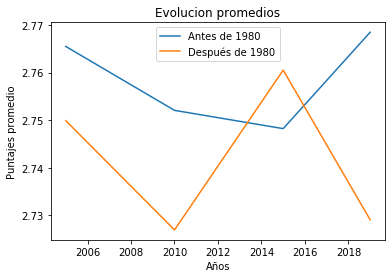

In [157]:
%time
# Se separa el dataframe en dos.
df_before = df_total[df_total["year_of_birth"] < 1980]
df_after = df_total[df_total["year_of_birth"] > 1980]

años = [2005, 2010, 2015, 2019]
ls_before = []
ls_after = []
for año in años:
    # Se van agregando los puntajes promedios por cada año a las listas.
    ls_before.append(df_before[df_before["year_of_pub"] == año].suma_critic.mean())
    ls_after.append(df_after[df_after["year_of_pub"] == año].suma_critic.mean())

# Gráfica de los datos
plt.plot(años, ls_before, label="Antes de 1980")
plt.plot(años, ls_after, label="Después de 1980")
plt.xlabel("Años")
plt.legend()
plt.ylabel("Puntajes promedio")
plt.title("Evolucion promedios")
plt.show()

Los puntajes promedios para los artistas nacidos antes del año 1980 estuvo en descenso desde el 2006 hasta el 2015, pero en los útilmos años ha subido en gran medida. Por otro lado, para los artistas nacidos despúes de 1980 los puntajes promedios bajaron a gran razón durante los años 2005 a 2010 y entre 2015 y 2019

En los artistas nacidos antes de 1980 se puede decir que han tenido una tendencia a subir durante los últimos años, mientras que los artistas nacidos después de 1980 tienden a tener periodos de aproximademente 5 años en los cuales bajan sus puntuaciones promedios o las suben considerablemente.

## Línea del tiempo

In [105]:
%time
ls = []
dic_year = {}
for year in range(2000,2020):
    # Se crear un dataframe para cada año.
    df_year = df_total[df_total["year_of_pub"] == year]
    # Se agrupa por géneros segun los álbumes con más ventas.
    gen = df_year.groupby("genre")["album_title"].count().sort_values(ascending = False).to_frame().reset_index()[:3]
    # Se agrgan los top 3 géneros a un diccionario que tiene como llave el año. 
    dic_year[year] = [gen["genre"][0], gen["genre"][1], gen["genre"][2]]

# Se transforma el diccionario en DataFrame
pd.DataFrame(dic_year)

Wall time: 0 ns


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie
1,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop
2,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap


In [158]:
%time
ls = []
dic_year = {}
# Se selecciona un país en específico.
df_pais = df_total[df_total["country"] == "Japan"]

for year in range(2000,2020):
    # Se crear un dataframe para cada año.
    df_year = df_pais[df_pais["year_of_pub"] == year]
    # Se agrupa por géneros segun los álbumes con más ventas.
    gen = df_year.groupby("genre")["album_title"].count().sort_values(ascending = False).to_frame().reset_index()[:3]
    # Se agrgan los top 3 géneros a un diccionario que tiene como llave el año. 
    dic_year[year] = [gen["genre"][0], gen["genre"][1], gen["genre"][2]]

# Se transforma el diccionario en DataFrame
pd.DataFrame(dic_year)

Wall time: 0 ns


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rap,Indie,Latino,Rock,Pop,Indie,Trap,Rap,Black Metal,Pop,Ambient,Pop,Indie,Unplugged,Latino,Unplugged,Rap,Pop,Rap,Trap
1,Indie,Punk,Pop,Rap,Rap,Brit-Pop,Rock,Pop,Punk,Indie,Lounge,Indie,Pop,Indie,J-Rock,Ambient,Latino,Rap,Dance,Latino
2,Western,Pop,Live,Pop-Rock,Blues,Ambient,Latino,Electro-Pop,Death Metal,Latino,Rap,Country,Pop-Rock,Blues,Indie,Western,J-Rock,K-Pop,Rock,Punk


Claramente para la mayoría de los países durante los últimos 20 años la tendencia de género con más álbumes publicados son los géneros: Indie, Pop y Rap. Ahora bien, si tomamos un país como Japón se puede observar que los top 3 génetos con más álbumes vendidos varía en cada año, por lo que la tendencia de los géneros mundialmente con más ventas no son necesariamente los géneros con más ventas para cada país.


## Géneros por artistas chilenos, peruanos, bolivianos y argentinos

In [149]:
%time
paises = ["Chile", "Argentina", "Bolivia", "Peru"]
dic_pais = {}
for pais in paises:
    df_pais = df_total[df_total["country"] == pais]
    gen = df_pais.groupby("genre")["album_title"].count().sort_values(ascending = False).to_frame().reset_index()
    dic_pais[pais] = [gen["genre"][num] for num in range(0,38)]
pd.DataFrame(dic_pais)

Wall time: 0 ns


,Chile,Argentina,Bolivia,Peru
0,Indie,Indie,Indie,Indie
1,Pop,Pop,Pop,Pop
2,Pop-Rock,Rock,Rap,Rap
3,Punk,Rap,Rock,Pop-Rock
4,Rap,Punk,Dance,Rock
5,Rock,Dance,Latino,Latino
6,Latino,Folk,Punk,Heavy Metal
7,Alternative,Indietronica,Pop-Rock,Boy Band
8,Holy Metal,Latino,Western,Hard Rock
9,Jazz,Holy Metal,Jazz,J-Rock


Se puede ver que los primeros 2 géneros para los cuatro países son los mismos(Indie y Pop), depués de ellos los géneros de Rock y Rap se encuentran presentes dentro de los primeros lugares, pero para el resto de los géneros no se evidencia ninguna tendencia destacable para los países.


>c) Utilizando el siguiente subconjunto de países: "United States", "Chile", "Japan", ¿es el país un buen predictor del puntaje promedio? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional y considere los intervalos del puntaje promedio en los percentiles: $[0,33],[34,66],[67,100]$. ¿Importa si se utiliza solo el subconjunto de datos o el dataset entero? 


**Bonus +10** El país como predictor del puntaje en cada crítico y viceversa.

>d) ¿Se puede decir que el género de un álbum es buen predictor del número de ventas? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional. 

Fije los intervalos de las ventas en los cuartiles 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)